<a href="https://colab.research.google.com/github/dpshepherd/PHY452_F2023/blob/main/Lab_2_theory_walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 theory walkthrough

### Theoretical background


Start with an incoming plane wave just before the diffraction grating,

$ E_i^{(-)} = E_0 e^{ik_0z} $,

where I have dropped the time dependence factor ($-i\omega t$) and assumed the plane wave is infinite in the $x$ and $y$ dimensions and monochromatic ($k_0=\frac{2\pi}{\lambda}$).

The transmission grating can be described by the function $t(x)$ that extends to $- ∞$ and $+ ∞$ in $y$,

$t(x) = rect(\frac{x}{d}) \circledast comb(\frac{x}{2d})$,

yielding the field immediately after the transmission grating as

$ E_i^{(+)} = E_0 e^{ik_0z} \cdot t(x) $.

Because the grating is one focal length away from a lens, we can express the field at the opposite focal plane, also known as the Fourier plane (fp) of our two lens imaging system, as

$ \tilde{E}_{fp}(u,v) = \frac{e^{i \frac{k_0}{2 f_1}(1-\frac{d}{f_1})(u^2+v^2)}}{i \lambda f_1} \times \int \int_{-∞}^{∞} E_i^{(+)}(x,y) e^{-i\frac{2 \pi}{\lambda f_1}(xu+uv)}dx dy$

This is the Fraunhofer approximation for the far-field solution. Because we are using a lens, the propagation distance that we evaluate the solution at is $d = f_1$, yielding,

$ \tilde{E}_{fp}(u,v) = \int \int_{-∞}^{∞} E_i^{(+)}(x,y) e^{-i\frac{2 \pi}{\lambda f_1}(xu+uv)}dx dy$

Once we have the spatial frequency representation of the electric field $ \tilde{E}_{fp}$, we can again represent the mask at the Fourier plane as a binary amplitude function, $M_j(u,v)$,

where $u$ and $v$ are the spatial frequency components corresponding to $x$ and $y$ respectively. We had three cases in this lab,

###Case 1 : all peaks

--------
$M_1(u,v) = 1$ for all $u,v$


###Case 2 : +1, 0, -1 peaks

--------
$M_2(u,v) = 1$ for $abs(u,v) <= \nu_{x_{m_1}}$

$M_2(u,v) = 0$ otherwise

where $\nu_{x_{m_1}}$ represents the spatial frequency value of the +1 and -1 frequency peaks of the grating. To obtain $\nu_{x_{m_1}}$, we use our knowledge of the grating spacing, the lens radius and focal length, and the wave vector.

We can obtain $\nu_{x_{m_1}}$ using our knowledge of the grating. First, we know the grating equation gives,

$(2d)sin(\theta)=m \lambda$,

for the first order peak ($m=1$). If we invoke the small angle approximation, we have,

$(2d)(\frac{x_{m_1}}{f_1}) = (1)\lambda $,

$x_{m_1} = (1)\frac{\lambda f_1}{2d}$

We can calculate then calculate the cyclic frequency for the peak as,

$k_{x_{m_1}} = \frac{k_0 x_{m_1}}{f_1}$,

and finally change to spatial frequency space,

$\nu_{x_{m_1}} = \frac{k_{x_{m_1}}}{2 \pi}$

For this grating and wavelength, we get and $\nu_{x_{m_1}} \sim 10.0$ $\frac{1}{mm}$ for a spacing of $2d=.1$ mm. You can find more on this derivation Pedrotti starting on pp. 459.

###Case 3: +1, -1 peaks only

--------
$M_3(u,v) = 1$ for $abs(u,v) = \nu_{x_{m_1}}$

$M_3(u,v) = 0$ otherwise

where $\nu_{x_{m_1}}$ represents the spatial frequency value of the +1 and -1 frequency peaks of the grating. This is the same $k_1$ as calcualted above.

--------

Now, we can again use the Fraunhofer far-field approximation to obtain the field at the image plane,

$ E_{ip}(x,y) = \int \int_{-∞}^{∞} M_j(u,v)\tilde{E}_{fp}(u,v) e^{i\frac{2 \pi}{\lambda f_2}(ux+vu)}du dv$.

Finally, the irradiance at the detector is given by, up to some constants,

$I_{ip} \sim E_{ip}\cdot E_{ip}^⋆ $.

I want to emphasize a couple important things about this problem.
1. It can be confusing on how to calculate the position of the mask coordinates. The general idea is that you can represent the Fourier transform as a peak in real space or in reciprocal space.
2. To solve this problem using a computer, we don't actually need to evaluate the integrals. Assume we set the lens aperture functions to $1$ and are are only evaluating the irradiance, we can setup the "forward" model for the electric field at the imaging plane (ip) in Python as,

$I_{ip}^j = C \cdot |F^{-1}[M_j \cdot F[E_i^{(+)}]]|^2$

where $M_j$ is a matrix for the reciprocal space representation of the mask at the Fourier Plane and $F^{-1}$, $F$ are the discrete inverse Fourier transform and discrete Fourier transform operators respectively.

## Simulation code

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# set up constants for problem. Convert all micron distances to mm and all 1/um frequencies to 1/mm frequencies
f1_mm = 250. # unit : mm
f2_mm = 300. # unit : mm
R1_mm = 25.4 # unit: mm
R2_mm = 25.4 # unit : mm
camera_pixel_um = 6.9 # unit : um
camera_pixel_mm = camera_pixel_um / 1000 # unit : mm
d_um = 50.0 # unit: um
d_mm = d_um / 1000 # unit : um
lambda_um = 0.561 # unit : um
lambda_mm = lambda_um / 1000 # unit : mm
k_inv_um = (2*np.pi)/(lambda_um) # unit : (rad / um)
k_inv_mm = (2*np.pi)/(lambda_mm) # unit : (rad / mm)
x1_mm = (1)* (lambda_mm*f1_mm/(2*d_mm))
nu1 = k_inv_mm * (x1_mm/f1_mm) / (2*np.pi)

In [34]:
# create transmission grating using direct convolution of boxcar and comb function (this can be slow!)
# to do this, we will create a physical model of the grating. We will use a grid step size in the x-plane of 0.1 microns and extend the grating over 100 mm.

dx_um = 1 # unit: um
dx_mm = dx_um / 1000. # unit: mm

n_boxcar_pixels = int(2*d_mm/dx_mm)
boxcar = np.zeros([n_boxcar_pixels])
boxcar[n_boxcar_pixels//2-n_boxcar_pixels//4:n_boxcar_pixels//2+n_boxcar_pixels//4] = 1

comb_L = 2* R1_mm # unit : um
n_grating_pixel = int(comb_L/dx_mm) # unit : um
comb = np.zeros([n_grating_pixel]) # unit : pixels
comb_indices = np.arange(0,n_grating_pixel,2*d_mm/dx_mm,dtype=int) # delta function locations
comb[comb_indices]=1

grating = np.convolve(boxcar, comb, mode='same') # boxcar convolved with comb

x_coords = np.linspace(-int(comb_L/2),int(comb_L/2),grating.shape[0])

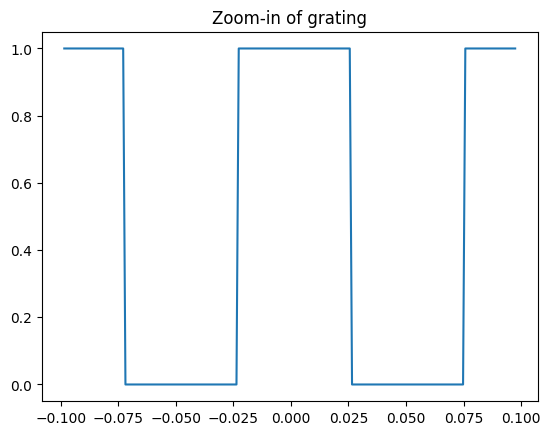

In [35]:
plt.plot(x_coords[n_grating_pixel//2-100:n_grating_pixel//2+100],
         grating[n_grating_pixel//2-100:n_grating_pixel//2+100])
plt.title('Zoom-in of grating')
plt.show()

### Calculate and plot the field at the Fourier plane

In [36]:
shape = grating.shape[0]
u_coords = np.squeeze(np.array([np.fft.fftshift(np.fft.fftfreq(shape, dx_mm))]))
index = np.argwhere(u_coords > -1*nu1)[0]
sym_index = np.argwhere(u_coords > nu1)[0]

field_fp = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(grating))).real # Real Fourier transform of grating. We have to use the fftshift function to center the F.T. around "zero" to match the conventions that we have when using analytical solutions.

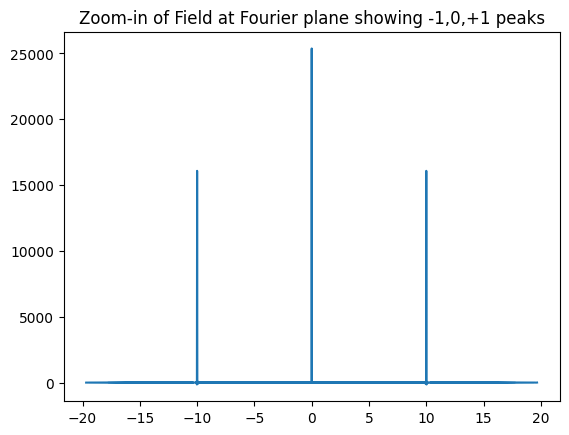

In [37]:
plt.plot(u_coords[n_grating_pixel//2-1000:n_grating_pixel//2+1000],
         field_fp[n_grating_pixel//2-1000:n_grating_pixel//2+1000])
plt.title('Zoom-in of Field at Fourier plane showing -1,0,+1 peaks')
plt.show()

### Apply mask in reciprocal space and calculate field plus irradiance at image plane for all three cases

In [38]:
shape = field_fp.shape
mask_ft_case1 = np.ones(shape[0],dtype=int)

mask_ft_case2 = np.zeros(shape[0],dtype=int)
mask_ft_case2[index[0]-10:sym_index[0]+10] = 1

mask_ft_case3 = np.zeros(shape[0],dtype=int)
mask_ft_case3[index[0]-10:sym_index[0]+10] = 1
mask_ft_case3[shape[0]//2-1:shape[0]//2+1]=0

field_ip_case1 = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(mask_ft_case1*field_fp))).real
irradiance_ip_case1 = field_ip_case1 * np.conj(field_ip_case1)

field_ip_case2 = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(mask_ft_case2*field_fp))).real
irradiance_ip_case2 = field_ip_case2 * np.conj(field_ip_case2)

field_ip_case3 = np.fft.fftshift(np.fft.ifftn(np.fft.ifftshift(mask_ft_case3*field_fp))).real
irradiance_ip_case3 = field_ip_case3 * np.conj(field_ip_case3)

x_coords_scaled = (f2_mm/f1_mm) *x_coords

### Plot zoom in of resulting images of gratings

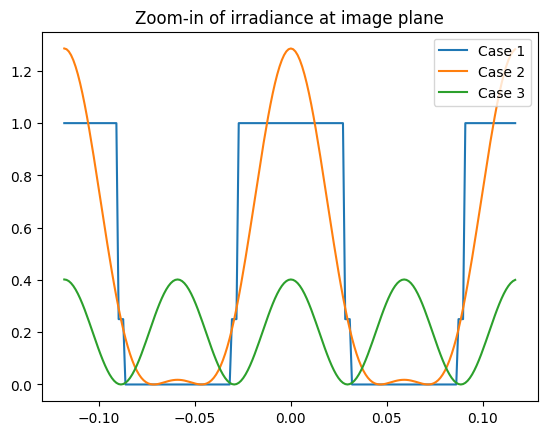

In [39]:
plt.plot(x_coords_scaled[n_grating_pixel//2-100:n_grating_pixel//2+100],
         irradiance_ip_case1[n_grating_pixel//2-100:n_grating_pixel//2+100])

plt.plot(x_coords_scaled[n_grating_pixel//2-100:n_grating_pixel//2+100],
         irradiance_ip_case2[n_grating_pixel//2-100:n_grating_pixel//2+100])

plt.plot(x_coords_scaled[n_grating_pixel//2-100:n_grating_pixel//2+100],
         irradiance_ip_case3[n_grating_pixel//2-100:n_grating_pixel//2+100])
plt.legend(['Case 1','Case 2','Case 3'],loc='upper right')
plt.title('Zoom-in of irradiance at image plane')
plt.show()